# Episode 1: Visualizing Data

* First step in all data anaytics!
* The human eye is well trained in capturing essential features
* Descriptive statistics are largely concerned with qunatifying intuitive concepts

## Rugplots

- simplest possible plot
- one-dimensional data
- ignores ordering
- use jitter to show multiplicities

<figure>
<img src="img/example_rugplot.png">
<figcaption>Example Rugplot</figcaption>
</figure>

## Histograms

- one-dimensional data only
- ignores ordering
- use area to compare ratios of data
- easier to read than rugplots
- many choices involved

<figure>
<img src="img/example_histogram.png">
<figcaption>Example Histogram</figcaption>
</figure>

We will talk more about histograms in the next episode.

## Scatterplots

- two dimensional data $x_i,y_i$.
- ignores ordering
- two-dimensional variant of rugplot
- show dependency between the two axes

<figure>
<img src="img/example_scatterplot_1.png" width="45%" style="float:left">
<img src="img/example_scatterplot_2.png" width="45%">
<figcaption>Example Scatterplot</figcaption>
</figure>

## Line-Plots

- special case of scatter plot
- interpolation lines add the illusion of continuity
- widely used in parctice

<figure>
<img src="img/example_lineplot.png">
<figcaption>Example Line Plot
</figcaption>
</figure>

# Relations between basic plot types

* Lineplots are a special case of scatterplots
* Scatterplot has marginal rugplots
* Lineplot has marginal y-rugplot
* Histograms show the same information as rugplots

# Creating Plots with the Jupyter toolchain

- Choice of tools is non essential
- Equivalent functionality can be provided by e.g. Excel, MATLAB or R
- Your monitoring tool should provide much functionality already
- This is not a introduction to python or the libraries

## Jupyter notebook

- http://ipython.org/notebook.html
- Cell based UI for python like Mathematica
- Decent code editing environment (Completion, Inline doc-strings, output formatting)
- Decent word-editor (Markdown, HTML, Mathjax)
- Mix in shell scripts
- Share notebooks on http://nb.bianp.net/sort/views/
- GitHub renders notebooks natively

This presentation is made with IPython Notebook:
https://github.com/HeinrichHartmann/Statistics-for-Engineers

## Essential Python Libraries

In [1]:
import numpy as np
# http://www.numpy.org/
# provides:
# - np.array() --  high performance array implementation
# - np.loadtxt() -- method to read in CSV files

from matplotlib import pyplot as plt
# http://matplotlib.org/
# provides:
# - plotting primitives: figures, axes, plygons
# - advanced plotting methods for eg. histograms, scatterplots
# - pyplot is a MATLAB like API to matplotlib

import seaborn as sns
# http://stanford.edu/~mwaskom/software/seaborn/
# like matplotlib, but:
# - focus on statistical data visualization
# - pretty colors

In [2]:
# Configure Notebooks graphic output
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,5)
np.set_printoptions(precision=2)

In [17]:
## Importing Data

# - A number of example datasets is provided in "DataSets/" folder
# - Look into one of them
# - In this case the schema is <timestamp>,<value>

!head "DataSets/RequestRates.csv" | tr ',' '\t'



1430272800	789.739501953125
1430276400	778.480285644531
1430280000	820.662231445312
1430283600	951.75146484375
1430287200	1142.41357421875
1430290800	1340.40576171875
1430294400	1485.84899902344
1430298000	1686.71533203125
1430301600	1672.89733886719
1430305200	1683.21887207031


In [23]:
# Read csv file with np.loadtxt()
# get help with `np.loadtxt?`
# Alternative: `np.genfromtxt?` (for graceful handling of missing/corrupt data)

X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
print(X)

[  789.74   778.48   820.66   951.75  1142.41  1340.41  1485.85  1686.72
  1672.9   1683.22  1733.16  1708.8   1717.04  1686.73  1614.71  1662.89
  1819.65  2039.41  2054.38  1864.98  1558.93  1121.76   901.66   840.
   807.54   787.16   798.6    907.34  1122.9   1301.9   1447.8   1504.15
  1264.87  1517.99  1497.66  1535.87  1470.72  1519.08  1354.72  1490.47
  1644.66  1699.89  1937.18  1814.11  1398.08  1113.33   930.78   872.48
   778.56   724.97   729.55   839.14  1005.12  1165.4   1342.08  1395.84
  1445.84  1410.66  1397.22  1401.25  1466.26  1570.61  1513.4   1542.78
  1638.52  1692.26  1747.94  1622.26  1328.53  1036.22   878.88   806.01
   769.58   746.68   777.18   851.2 ]


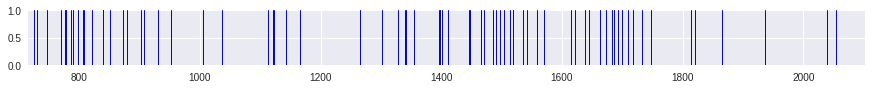

In [27]:
## Creating Ruplots
plt.figure(figsize=(15,1)) # Use smaller image canvas

# Seaborn provides a built-in method for Rugplots
# semi-colon ';' suppresses text output
# for some resason the default color
sns.rugplot(X, color="blue",height=1); 

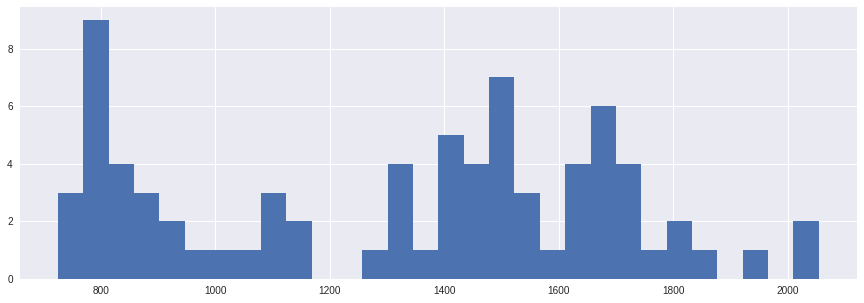

In [28]:
## Creating Histograms

# Matplotlib provides a built-in method
plt.hist(X, bins=30);

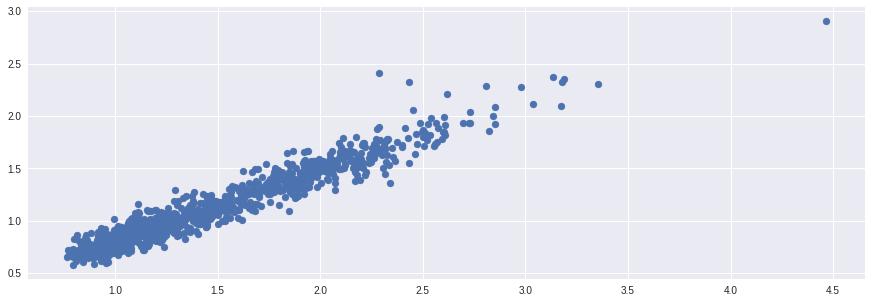

In [29]:
## Creating Scatterplots

# !csvlook DataSets/ReqMultiNode.csv -H --> Large output (-> Terminal)

# load two-dimensional datasets
table = np.loadtxt("DataSets/ReqMultiNode.csv", delimiter=',', usecols=(0,1,2,3,4))[:1000]

T = table[:,0] # time stamps
A = table[:,1] # node A-requests
B = table[:,2] # node B-requests

plt.scatter(A,B);

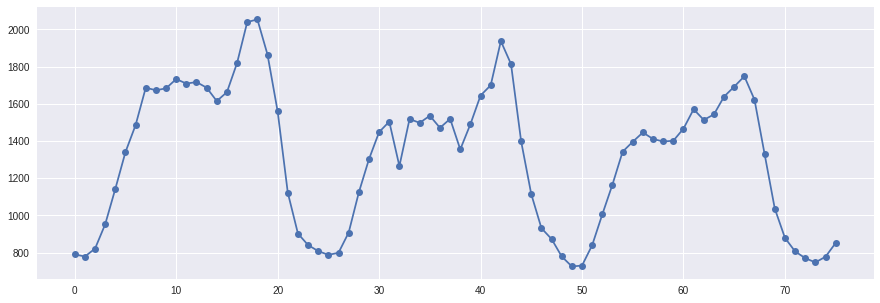

In [15]:
## Creating LinePlots

# Matplotlib provides a built-in method
# use style 'o-' to show datapoints (o) and line (-)
plt.plot(X,'o-');

# Exercise

1. Make a scatter plot of column combinations (1,2), (1,3), (2,3) from "dc1cpu.csv"
2. Plot the colums 2-6 over time (colum 1) in  "dc1cup.csv"
3. Make a histograms for the web latencies in "WebLatency.csv"